# Spatial Transformations

#### Eko Rudiawan Jamzuri

## Learning Objective

1. Descriptions: Position, Orientations, and Frames
2. Mappings: Changing Descriptions from Frame to Frame
3. Operators: Translations, Rotations, and Transformations

## Position

* Location of a point when the coordinate system is established
* Location is defined by 3x1 position vector
* Position vector is represented with respect to the defined coordinate system

**Position of point $P$ relative from system coordinate $A$**

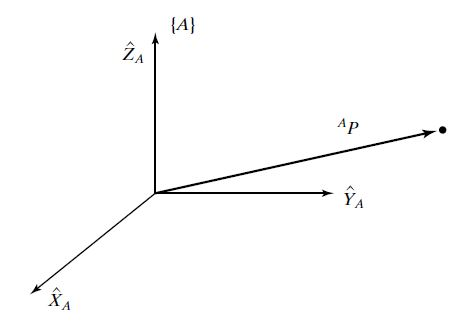

${}^{A}P = \left[\begin{array}{l}
                            p_{x} \\
                            p_{y} \\
                            p_{z}
           \end{array}\right]$

* ${}_{}^{A}P$ : Represents a position vector of point $P$ written in coordinate system $\{A\}$
* $p_{x}$ : Relative position of point $P$ from the coordinate system $\{A\}$, measured through the $x$-axis direction
* $p_{y}$ : Relative position of point $P$ from the coordinate system $\{A\}$, measured through the $y$-axis direction
* $p_{z}$ : Relative position of point $P$ from the coordinate system $\{A\}$, measured through the $z$-axis direction

## Orientations

* Orientation of a body in space
* The coordinate system is placed on the body for describing the orientation
* The orientation is described relative to the reference system coordinate

**Orientation of coordinate system $B$ relative from system coordinate $A$**

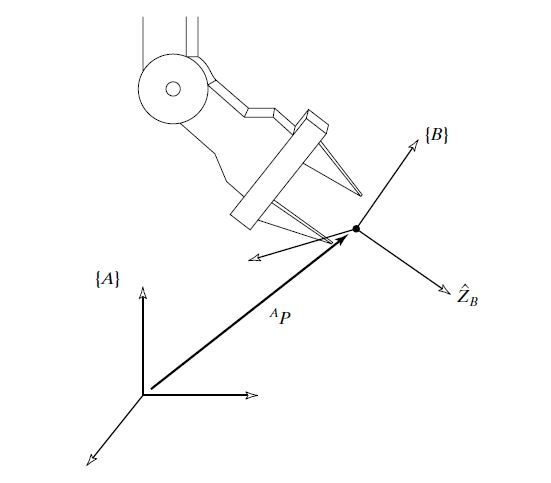

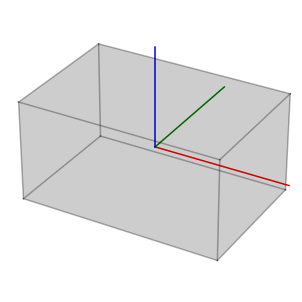

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pytransform3d.plot_utils import plot_box, plot_length_variable, remove_frame, Frame
from pytransform3d.transformations import plot_transform
from pytransform3d.plot_utils import make_3d_axis
from pytransform3d.urdf import Box 

A = np.eye(4)
gamma = np.radians(60)
Rz = np.array([[np.cos(gamma), -np.sin(gamma), 0],
               [np.sin(gamma), np.cos(gamma), 0],
               [0, 0, 1]])
B = np.array([[Rz[0,0], Rz[0,1], Rz[0,2], 0],
              [Rz[1,0], Rz[1,1], Rz[1,2], 0],
              [Rz[2,0], Rz[2,1], Rz[2,2], 0],
              [0, 0, 0, 1]])
ATB = A.dot(B)

plt.figure()
ax = make_3d_axis(ax_s=1, unit="m", n_ticks=6)

ax = plot_box(size=[1.5, 1, 1], wireframe=False, alpha=0.1, color="k", ax_s=0.6)
plot_transform(ax=ax)
plot_box(ax=ax, size=[1.5, 1, 1], wireframe=True,  alpha=0.3)
remove_frame(ax)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pytransform3d.plot_utils import plot_box, plot_length_variable, remove_frame, Frame
from pytransform3d.transformations import plot_transform
from pytransform3d.plot_utils import make_3d_axis
from pytransform3d.urdf import Box 

A = np.eye(4)
gamma = np.radians(45)
Rz = np.array([[np.cos(gamma), -np.sin(gamma), 0],
               [np.sin(gamma), np.cos(gamma), 0],
               [0, 0, 1]])
B = np.array([[Rz[0,0], Rz[0,1], Rz[0,2], 0],
              [Rz[1,0], Rz[1,1], Rz[1,2], 0],
              [Rz[2,0], Rz[2,1], Rz[2,2], 0],
              [0, 0, 0, 1]])
ATB = A.dot(B)

plt.figure()
ax = make_3d_axis(ax_s=1, unit="m", n_ticks=6)
plot_transform(ax=ax, A2B=ATB)
ax = plot_box(size=[1.5, 1, 1], wireframe=False, A2B=ATB, alpha=0.1, color="k", ax_s=0.6)
plot_transform(ax=ax)
plot_box(ax=ax, size=[1.5, 1, 1], wireframe=True,  A2B=ATB, alpha=0.3)
remove_frame(ax)
plt.show()

${}_{B}^{A}R = \left[\begin{array}{ccc}
                r_{11} & r_{12} & r_{13} \\
                r_{21} & r_{22} & r_{23} \\
                r_{31} & r_{32} & r_{33}
               \end{array}\right]$

${}_{B}^{A}R = R_{z}(\gamma) \cdot R_{y}(\beta) \cdot R_{x}(\alpha)$

* ${}_{B}^{A}R$ : Orientation of $\{B\}$ relative to $\{A\}$
* $r_{11},r_{12},..,r_{33}$ : Element of rotation matrix
* $R_{z}(\gamma)$ : Rotation matrix respect to the $z$-axis
* $R_{y}(\beta)$ : Rotation matrix respect to the $y$-axis
* $R_{x}(\alpha)$ : Rotation matrix respect to the $x$-axis

$R_{z}(\gamma) = \left[\begin{array}{ccc}
                  \cos \gamma & -\sin \gamma & 0 \\
                  \sin \gamma & \cos \gamma & 0 \\
                  0 & 0 & 1
                 \end{array}\right]$

$R_{y}(\beta) = \left[\begin{array}{ccc}
                 \cos \beta & 0 & \sin \beta \\
                 0 & 1 & 0 \\
                 -\sin \beta & 0 & \cos \beta
                \end{array}\right]$

$R_{x}(\alpha) = \left[\begin{array}{ccc}
                  1 & 0 & 0 \\
                  0 & \cos \alpha & -\sin \alpha \\
                  0 & \sin \alpha & \cos \alpha
                 \end{array}\right]$

## Frame

* Frame describe both position and orientation
* Frame can describe of one coordinate system relative to another
* **Position** could be represented by a frame whose rotation-matrix part is the identity matrix
* **Orientation** could be represented by a frame whose position-vector part was the zero vector

$\{B\}=\left\{{}_{B}^{A}R,{}^{A}P_{BORG}\right\}$

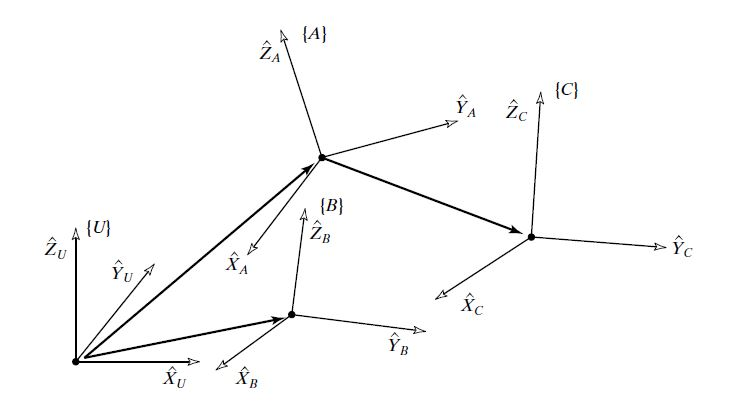


## Translated Frame

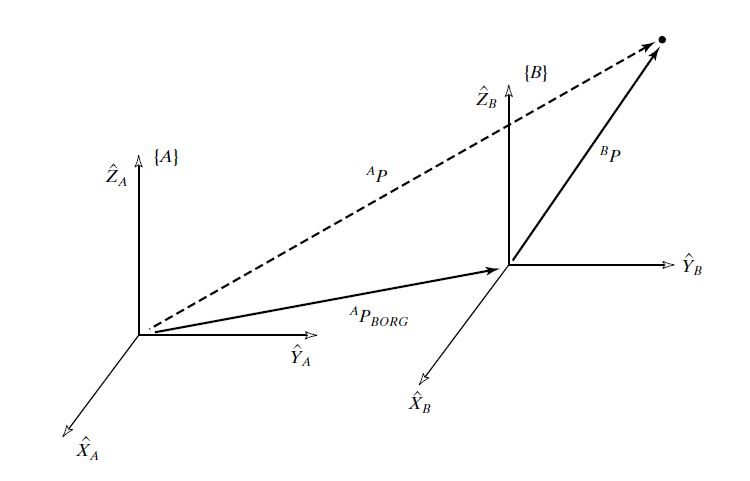

${}_{}^{A}P = {}_{}^{B}P + {}_{}^{A}P_{BORG}$

### Example 1

Point $P$ is located at $x=10$, $y=5$, and $z=5$ relative from frame $\{{B}\}$. Frame $\{{B}\}$ is translated from frame $\{{A}\}$ with $dx = 5$, $dy = 5$, and $dz = 0$. Find location of point $P$ relative from frame ${\{A\}}$.

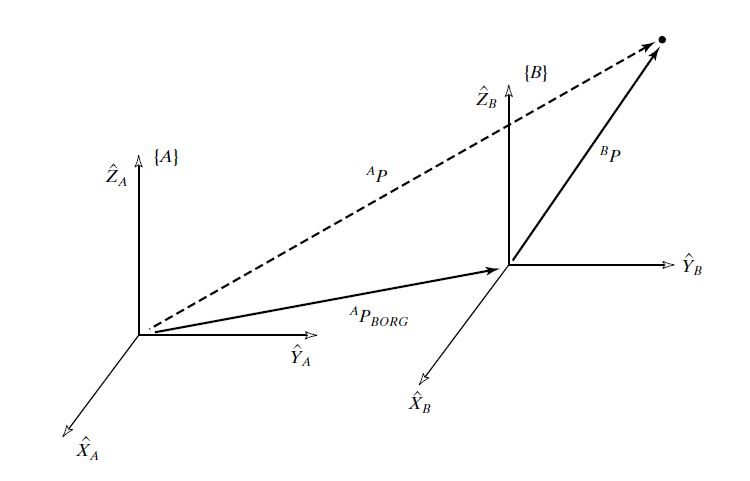

**Python Code**

In [ ]:
import numpy as np

B_P = np.array([[10], [5], [5]])
A_P_BORG = np.array([[5], [5], [0]])
A_P = B_P + A_P_BORG
print(A_P)

## Rotated Frame

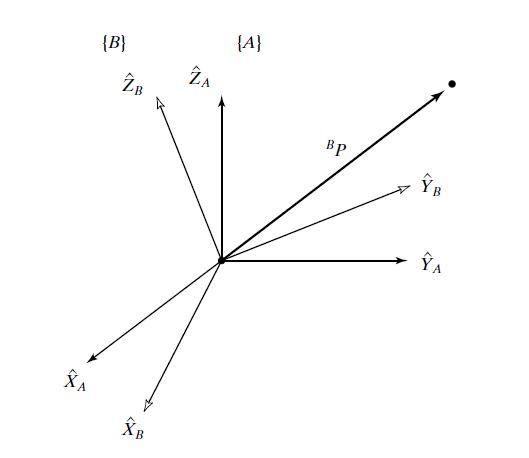

${}_{}^{A}P = {}_{B}^{A}R \cdot {}_{}^{B}P$

${}_{B}^{A}R = {}_{A}^{B}R^{-1} = {}_{A}^{B}R^{T}$

### Example 2

Point $P$ is located at $x=0$, $y=2$, and $z=0$ relative from frame $\{{B}\}$. Frame $\{{B}\}$ is rotated from frame $\{{A}\}$ through $z$-axis about 30 deg. Find (${}_{}^{A}P$), the location of point $P$ relative from frame $\{{A}\}$.

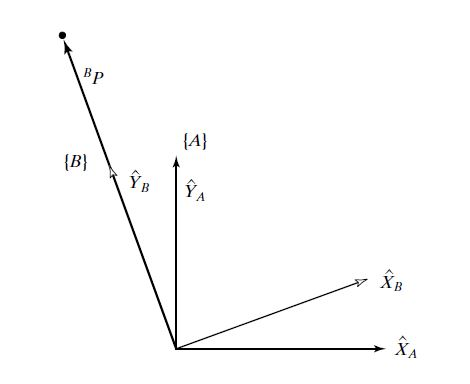

**Python Code**

In [ ]:
B_P = np.array([[0], [2], [0]])

gamma = np.radians(30)
beta = np.radians(0)
alpha = np.radians(0)

Rz = np.array([[np.cos(gamma), -np.sin(gamma), 0],
               [np.sin(gamma), np.cos(gamma), 0],
               [0, 0, 1]])
Ry = np.array([[np.cos(beta), 0, np.sin(beta)],
               [0, 1, 0],
               [-np.sin(beta), 0, np.cos(beta)]])
Rx = np.array([[1, 0, 0],
               [0, np.cos(alpha), -np.sin(alpha)],
               [0, np.sin(alpha), np.cos(alpha)]])

A_R_B = Rz.dot(Ry).dot(Rx)
A_P = A_R_B.dot(B_P)
print(A_P)

## Transformed Frame

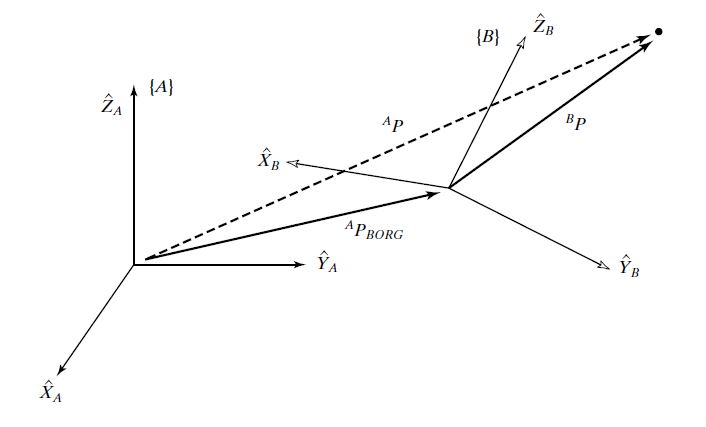


${}_{}^{A}P = {}_{B}^{A}R \cdot {}_{}^{B}P + {}_{}^{A}P_{BORG}$

${}_{}^{A}P = {}_{B}^{A}T \cdot {}_{}^{B}P$

$\left[\begin{array}{c}
        {}_{}^{A}P \\
        1
       \end{array}\right]
  =
  \left[\begin{array}{ccc|c}
         & {}_{B}^{A}R & & {}^{A} P_{BORG} \\
         \hline 0 & 0 & 0 & 1
        \end{array}\right]
  \cdot
  \left[\begin{array}{c}
         {}_{}^{B}P \\
         1
        \end{array}\right]$

### Example 3

Frame $\{B\}$ is rotated relative to frame $\{A\}$ through $z$-axis by 30 degrees, translated 10 units in $x$-axis, and translated 5 units in $y$-axis. Find ${}_{}^{A}P$, where ${}_{}^{B}P = [3.0\space7.0\space0.0]^{T}$

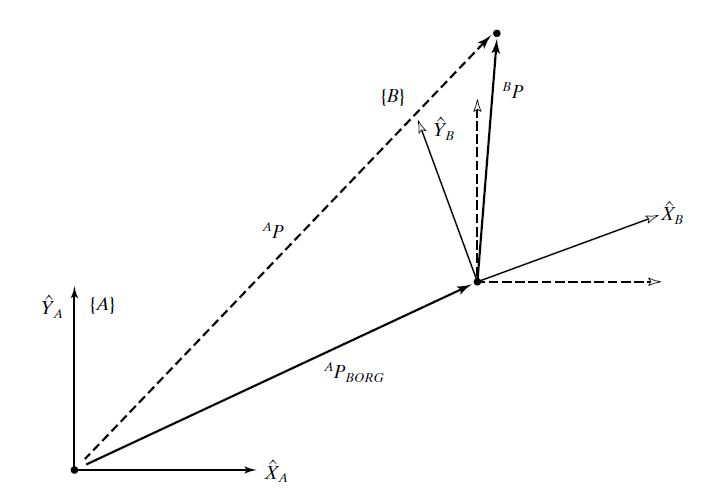

**Python Code**

In [ ]:
gamma = np.radians(30)
dx, dy, dz = 10, 5, 0

Rz = np.array([[np.cos(gamma), -np.sin(gamma), 0],
               [np.sin(gamma), np.cos(gamma), 0],
               [0, 0, 1]])

A_T_B = np.array([[Rz[0,0], Rz[0,1], Rz[0,2], dx],
                  [Rz[1,0], Rz[1,1], Rz[1,2], dy],
                  [Rz[2,0], Rz[2,1], Rz[2,2], dz],
                  [0, 0, 0, 1]])

B_P = np.array([[3], [7], [0], [1]])

A_P = A_T_B.dot(B_P)

print(A_P)

## Translation as Matrix Operator

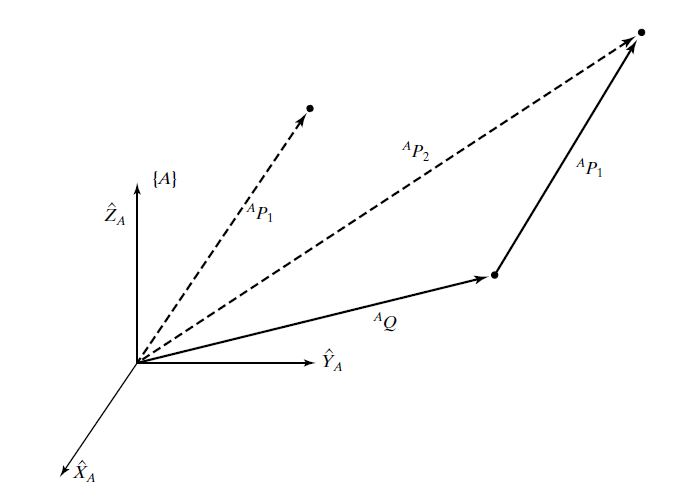

${}^{A}P_{2} = {}_{}^{A}P_{1} + {}_{}^{A}Q$

${}^{A}P_{2} = D_{Q}(q) \cdot {}_{}^{A}P_{1}$

$D_{Q}(q)=\left[\begin{array}{cccc}
                1 & 0 & 0 & q_{x} \\
                0 & 1 & 0 & q_{y} \\
                0 & 0 & 1 & q_{z} \\
                0 & 0 & 0 & 1
          \end{array}\right]$

### Example 4

Initial position of ${}_{}^{A}P_{1} =[0 \space 10 \space 10]^{T}$. Then the point $P_{1}$ is translated by ${}_{}^{A}Q = [0 \space 20 \space 10]^{T}$. Where is the new location of ${}_{}^{A}P_{1}$?

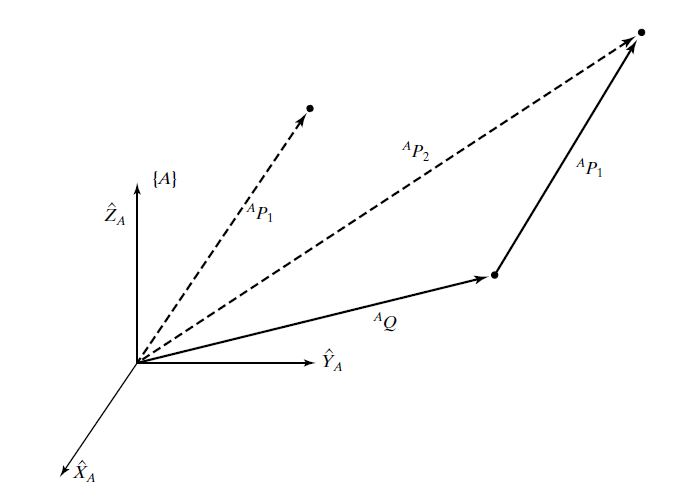

**Python Code**

In [ ]:
A_P1 = np.array([[0], [10], [10], [1]])

R = np.eye(3)
qx, qy, qz = 0, 20, 10

DQ = np.array([[R[0,0], R[0,1], R[0,2], qx],
               [R[1,0], R[1,1], R[1,2], qy],
               [R[2,0], R[2,1], R[2,2], qz],
               [0, 0, 0, 1]])

A_P2 = DQ.dot(A_P1)

print(A_P2)

## Rotation as Matrix Operator

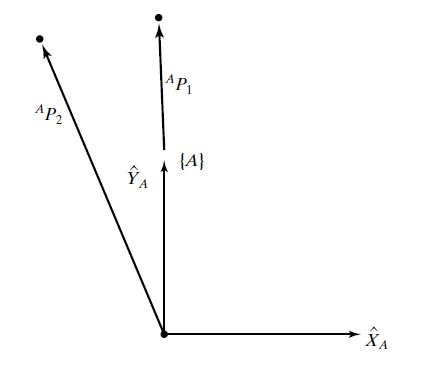

${}_{}^{A}P_{2} = R_{K}(\theta) \cdot {}_{}^{A}P_{1}$

### Example 5

Compute the vector ${}_{}^{A}P_{2}$ obtained by rotating vector ${}_{}^{A}P_{1}$ about $z$-axis by 30 degrees. The ${}_{}^{A}P_{1} = [0 \space 2 \space 0]^{T}$

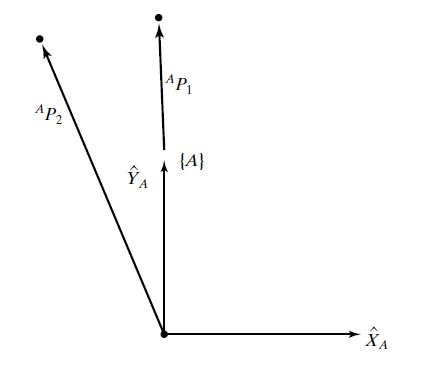

**Python Code**

In [ ]:
A_P1 = np.array([[0], [2], [0], [1]])

gamma = np.radians(30)

Rz = np.array([[np.cos(gamma), -np.sin(gamma), 0],
               [np.sin(gamma), np.cos(gamma), 0],
               [0, 0, 1]])

RK = np.array([[Rz[0,0], Rz[0,1], Rz[0,2], 0],
               [Rz[1,0], Rz[1,1], Rz[1,2], 0],
               [Rz[2,0], Rz[2,1], Rz[2,2], 0],
               [0, 0, 0, 1]])

A_P2 = RK.dot(A_P1)
print(A_P2)

## Transformation Operator (Translation & Rotation)

* Transformation contains two operation (rotate then translate)
* **It is not equal with translate then rotate**

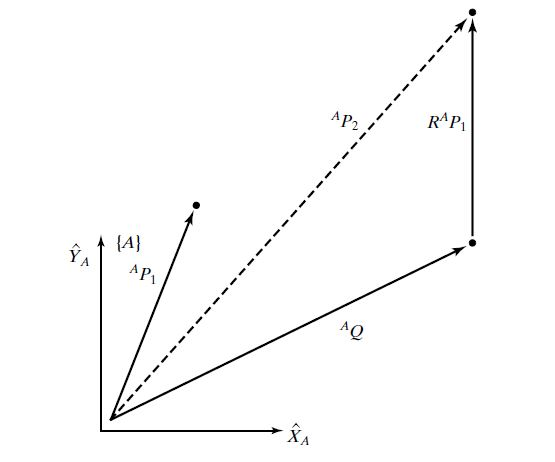

${}_{}^{A}P_{2} = T \cdot {}^{A}P_{1}$

### Example 6

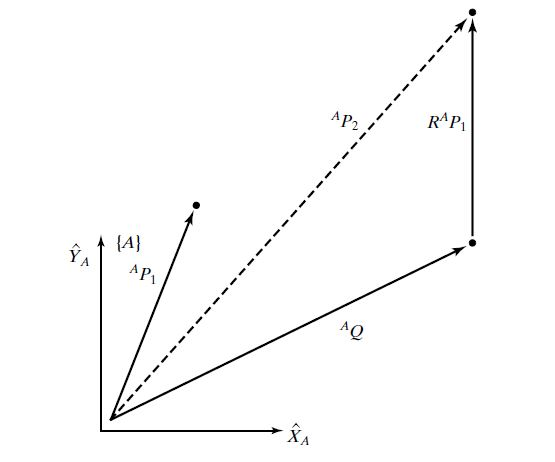
If ${}_{}^{A}P_{1}$ is rotated about $z$-axis by 30 degrees and then
it is translated by 10 units in $x$-axis and 5 units in $y$-axis. Find ${}_{}^{A}P_{2}$, where ${}_{}^{A}P_{1} = [3.0 \space 7.0 \space 0.0]^{T}$

In [ ]:
dx, dy, dz = 10, 5, 0

gamma = np.radians(30)
Rz = np.array([[np.cos(gamma), -np.sin(gamma), 0],
               [np.sin(gamma), np.cos(gamma), 0],
               [0, 0, 1]])

A_P1 = np.array([[3], [7], [0], [1]])

T = np.array([[Rz[0,0], Rz[0,1], Rz[0,2], dx],
              [Rz[1,0], Rz[1,1], Rz[1,2], dy],
              [Rz[2,0], Rz[2,1], Rz[2,2], dz],
              [0, 0, 0, 1]])

A_P2 = T.dot(A_P1)

print(A_P2)

## Compound Transformation

###### ${}^{A}P = {}_{B}^{A}T \cdot {}_{C}^{B}T \cdot {}_{}^{C}P$
###### ${}_{C}^{A}T = {}_{B}^{A}T \cdot {}_{C}^{B}T$

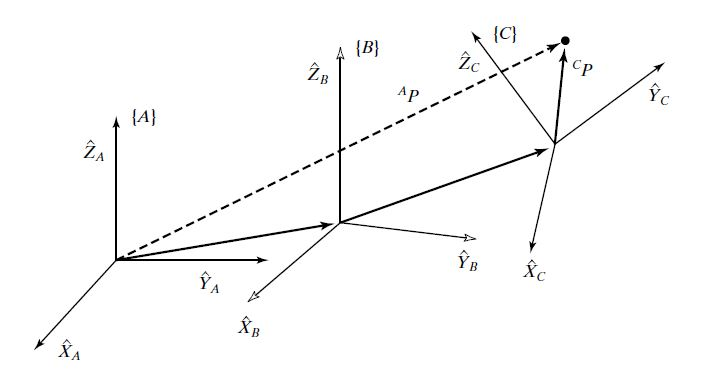



## Inverse Transform

###### ${}_{A}^{B}T = {}_{B}^{A}T^{-1}$

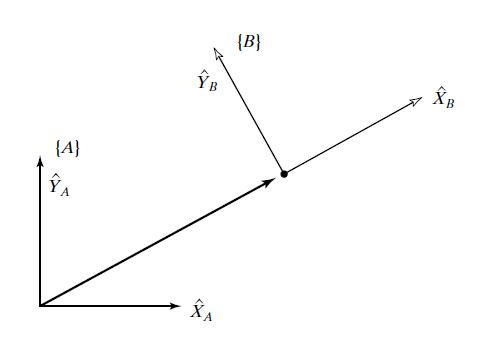

## Transform Equations

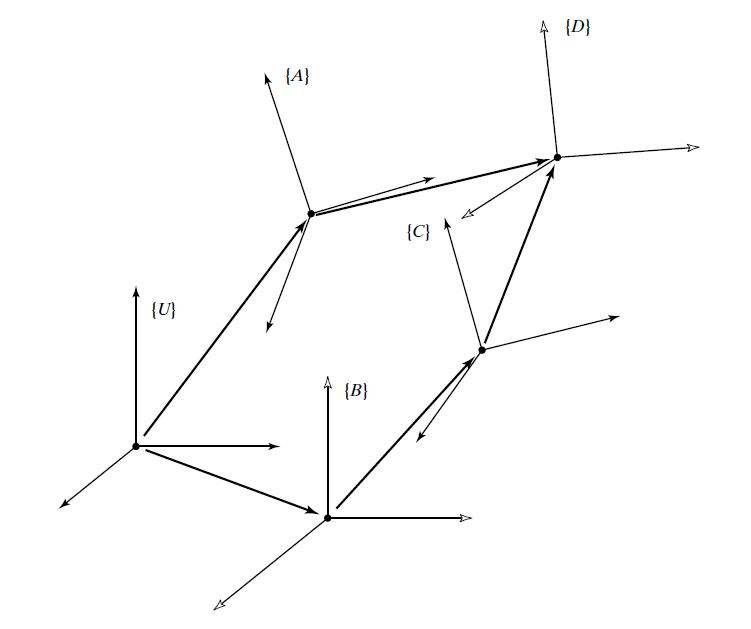

${}_{D}^{U} T= {}_{A}^{U}T \cdot {}_{D}^{A}T$

${}_{D}^{U} T= {}_{B}^{U}T \cdot {}_{B}^{C}T \cdot {}_{C}^{D}T$

### Case Study

Find position and orientation of bolt relative to tool frame

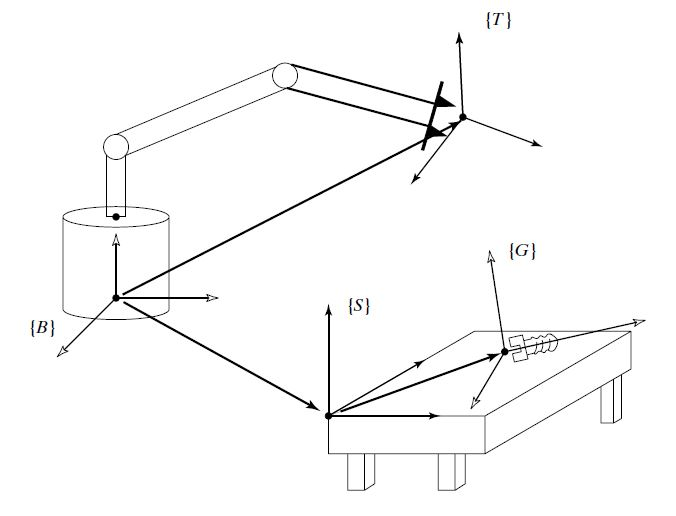

${}_{G}^{T}T = {}_{T}^{B}T^{-1} \cdot {}_{S}^{B}T \cdot {}_{G}^{S}T$

## Representation of Orientation

1. X-Y-Z Fixed Angle
2. Z-Y-X Euler Angle
3. Z-Y-Z Euler Angle

## X-Y-Z Fixed Angles

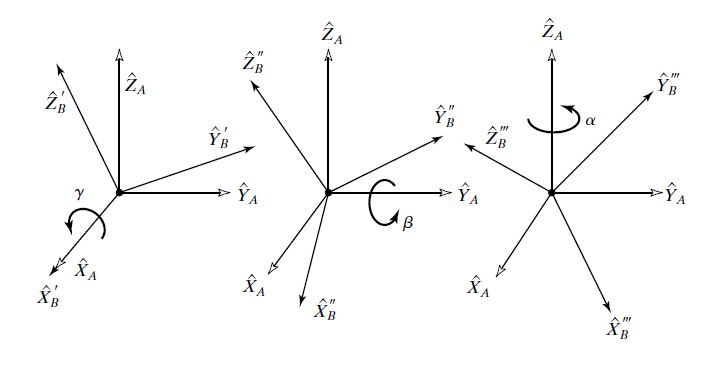

${}_{B}^{A}R_{XYZ}(\gamma, \beta, \alpha) = R_{Z}(\alpha) \cdot R_{Y}(\beta) \cdot R_{X}(\gamma)$

${}_{B}^{A}R_{XYZ}(\gamma, \beta, \alpha) = \left[\begin{array}{lll}
                                                   r_{11} & r_{12} & r_{13} \\
                                                   r_{21} & r_{22} & r_{23} \\
                                                   r_{31} & r_{32} & r_{33}
                                            \end{array}\right]$

$\beta=\operatorname{Atan}2 \left(-r_{31}, \sqrt{r_{11}^{2} + r_{21}^{2}}\right)$

$\alpha=\operatorname{Atan}2 \left(\frac{r_{21}}{c\beta}, \frac{r_{11}}{c\beta}\right)$

$\gamma=\operatorname{Atan}2 \left(\frac{r_{32}}{c\beta}, \frac{r_{33}}{c\beta}\right)$

## Z-Y-X Eeuler Angles

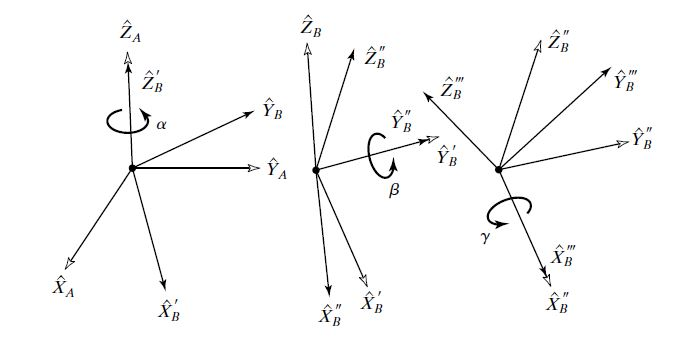

${ }_{B}^{A}R_{Z^{\prime}Y^{\prime}X^{\prime}} = R_{Z}(\alpha) \cdot R_{Y}(\beta) \cdot R_{X}(\gamma)$


## Z–Y–Z Euler Angles

### IF $sin\beta\neq0$

$\beta = \operatorname{Atan2}\left( \sqrt{r_{31}^{2} + r_{32}^{2}}, r_{33} \right)$

$\alpha = \operatorname{Atan2}\left( \frac{r_{23}}{s\beta}, \frac{r_{13}}{s\beta} \right)$

$\gamma = \operatorname{Atan2}\left( \frac{r_{32}}{s\beta}, \frac{-r_{31}}{s\beta} \right)$


### IF $sin\beta=0$

$\beta = 0.0$

$\alpha = 0.0$

$\gamma = \operatorname{Atan2}\left( -r_{12}, r_{11} \right)$

# Thank You